## Learning Outcomes
- Exploratory data analysis & preparing the data for model building. 
- Machine Learning - Supervised Learning Classification
  - Logistic Regression
  - Naive bayes Classifier
  - KNN Classifier
  - Decision Tree Classifier
  - Random Forest Classifier
  - Ensemble methods
- Training and making predictions using different classification models.
- Model evaluation

## Objective: 
- The Classification goal is to predict “heart disease” in a person with regards to different factors given. 

## Context:
- Heart disease is one of the leading causes of death for people of most races in the US. At least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. 
- Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Machine learning methods may detect "patterns" from the data and can predict whether a patient is suffering from any heart disease or not..

## Dataset Information

#### Source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?datasetId=1936563&sortBy=voteCount
Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. 

This dataset consists of eighteen columns
- HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
- BMI: Body Mass Index (BMI)
- Smoking: smoked at least 100 cigarettes in your entire life
- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- Stroke:Ever had a stroke?
- PhysicalHealth: physical health, which includes physical illness and injury
- MentalHealth: for how many days during the past 30 days was your mental health not good?
- DiffWalking: Do you have serious difficulty walking or climbing stairs?
- Sex: male or female?
- AgeCategory: Fourteen-level age category
- Race: Imputed race/ethnicity value
- Diabetic: diabetes?
- PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- GenHealth: Would you say that in general your health is good, fine or excellent?
- SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
- Asthma: you had asthma?
- KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- SkinCancer: Ever had skin cancer?

### 1. Importing Libraries

In [1]:
# Import libraries
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC ,SVR
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import metrics

import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings

In [2]:
warnings.filterwarnings('ignore')

### 2. Load the dataset and display a sample of five rows of the data frame.

In [5]:
#Loading the dataset
train = pd.read_csv('heart_2020_cleaned.csv')

In [6]:
#Display the details
train

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [7]:
train.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### 3. Check the shape of the data (number of rows and columns). Check the general information about the dataframe using the .info() method.

In [8]:
#Check the shape
train.shape

(319795, 18)

In [9]:
#Display the information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [10]:
train.describe().T.style.set_properties(**{'background-color': 'grey','color': 'white','border-color': 'white'})

,count,mean,std,min,25%,50%,75%,max
BMI,319795.000000,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
PhysicalHealth,319795.000000,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,319795.000000,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
SleepTime,319795.000000,7.097075,1.436007,1.000000,6.000000,7.000000,8.000000,24.000000


### 4. Check the statistical summary of the dataset and write your inferences.

In [11]:
#Copy the dataset to df
df=train

In [12]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [13]:
# Column Statistics (of numerical data)
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


### for categorical we cant do statistics because they are not numeric

### 5. Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any.

In [14]:
# Missing Values Check
print("The existence of missing values in each column:")
df.isnull().any()

The existence of missing values in each column:


HeartDisease        False
BMI                 False
Smoking             False
AlcoholDrinking     False
Stroke              False
PhysicalHealth      False
MentalHealth        False
DiffWalking         False
Sex                 False
AgeCategory         False
Race                False
Diabetic            False
PhysicalActivity    False
GenHealth           False
SleepTime           False
Asthma              False
KidneyDisease       False
SkinCancer          False
dtype: bool

In [15]:
# Percentage
df.isnull().sum()/len(df) * 100

HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64

### There are no missing values.

### 6. Check if there are any duplicate rows. If any drop them and check the shape of the dataframe after dropping duplicates.

In [16]:
df.shape

(319795, 18)

In [17]:
# Is duplicates avaialble 
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
319790    False
319791    False
319792    False
319793    False
319794    False
Length: 319795, dtype: bool

In [18]:
# Sum of duplicate
df.duplicated().sum()

18078

In [19]:
# Since there is duplicates; Remove the duplicate
df = df.drop_duplicates()

In [20]:
# Sum of duplicate after dropping duplicate
df.duplicated().sum()

0

In [21]:
df.shape

(301717, 18)

### 7. Check the distribution of the target variable (i.e. 'HeartDisease') and write your observations.

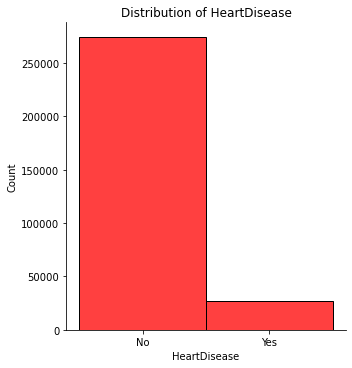

In [22]:
# Distribution of HeartDisease 
sns.displot(df['HeartDisease'], bins=10, color='r')
plt.title("Distribution of HeartDisease")
plt.savefig("DistributionHD.png")
plt.show()

### 8. Visualize the distribution of the target column 'Heart disease' with respect to various categorical features and write your observations.

In [23]:
# get categorical columns
categ_cols=df.select_dtypes(include=[np.object])
categ_cols.columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

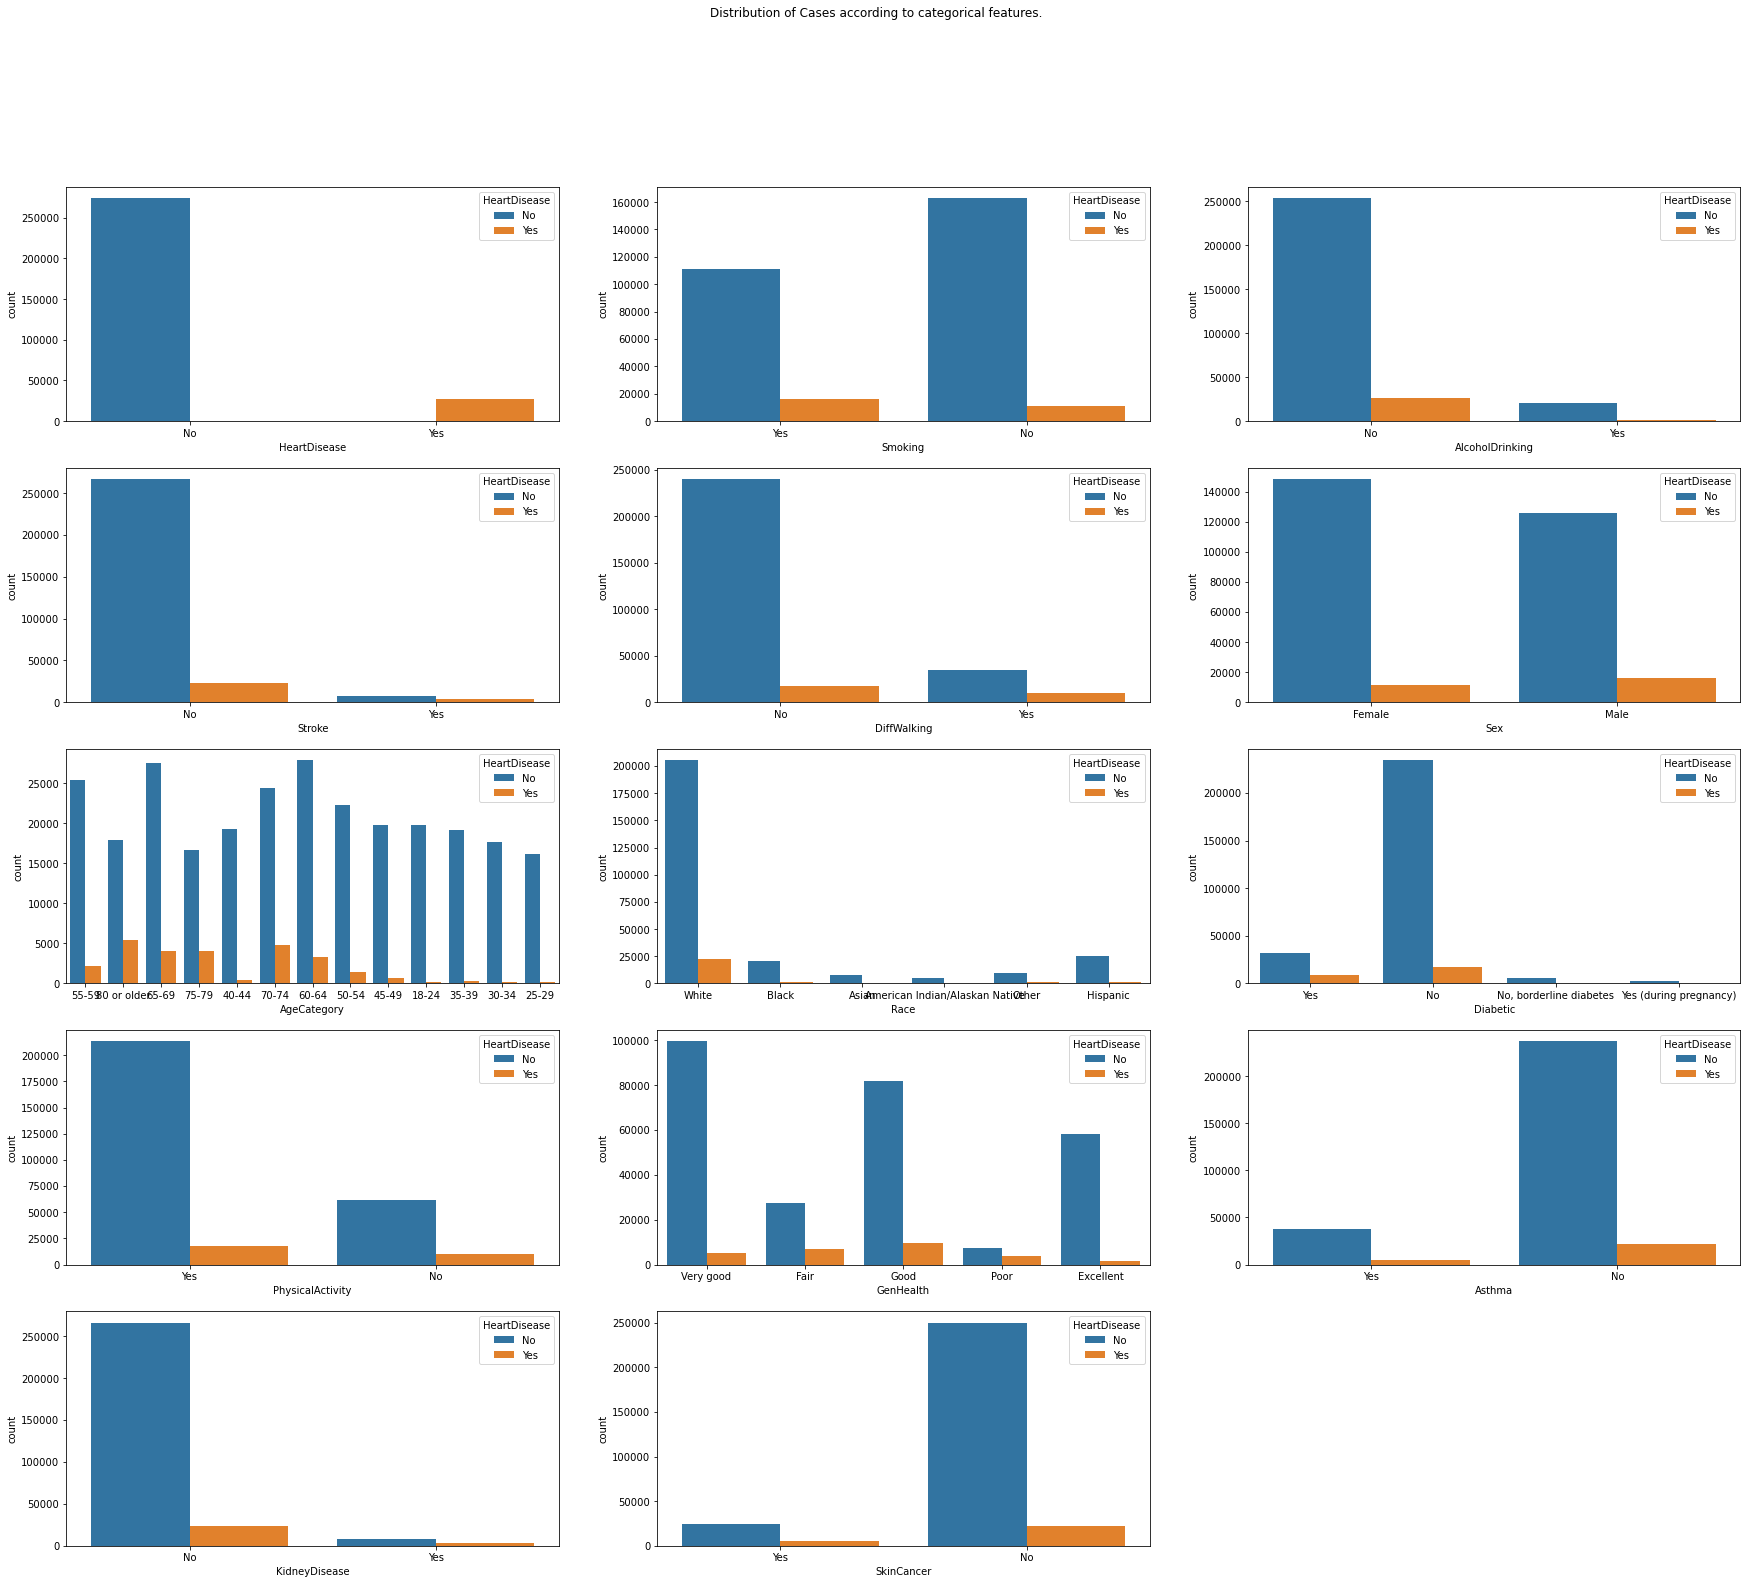

In [24]:
# Based on categorical columns distribution
plt.figure(figsize=(30,25))
for i,feature in enumerate(categ_cols):
    plt.subplot(5,3,i+1)
    sns.countplot(x=feature,hue='HeartDisease',data=df)
plt.suptitle("Distribution of Cases according to categorical features.")
plt.savefig("DistributionCateg.png")


### 9. Check the unique categories in the column 'Diabetic'. Replace 'Yes (during pregnancy)' as 'Yes' and 'No, borderline diabetes' as 'No'.

In [25]:
# Unique categories in Diabetic
pos = list(df['Diabetic'].unique()) 
print('Total number of unique categories in Diabetic:', len(pos))
print(pos)

Total number of unique categories in Diabetic: 4
['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)']


In [26]:
# Replace 'Yes (during pregnancy)' as 'Yes' and 'No, borderline diabetes' as 'No'
df['Diabetic'] = df['Diabetic'].replace({'No, borderline diabetes':'No','Yes (during pregnancy)':'Yes'})

In [27]:
#Replaced
df['Diabetic'].value_counts()

No     258572
Yes     43145
Name: Diabetic, dtype: int64

### 10. For the target column 'HeartDiease', Replace 'No' as 0 and 'Yes' as 1. 

In [28]:
# Unique categories in HeartDisease
pos = list(df['HeartDisease'].unique()) 
print('Total number of unique categories in HeartDisease:', len(pos))
print(pos)

Total number of unique categories in HeartDisease: 2
['No', 'Yes']


In [29]:
# Replace 'No' as 0 and 'Yes' as 1 in column HeartDisease
df['HeartDisease'] = df['HeartDisease'].replace({'No':0,'Yes':1})

In [30]:
#After replaced
df['HeartDisease'].value_counts()

0    274456
1     27261
Name: HeartDisease, dtype: int64

### 11. Label Encode the columns "AgeCategory", "Race", and "GenHealth". Encode the rest of the columns using dummy encoding approach.

In [31]:
# label encode columns
for col in ['AgeCategory', 'Race','GenHealth']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [32]:
# dummy
df = pd.get_dummies(df, columns=['Diabetic', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer','DiffWalking'])

In [33]:
df.sample(5)

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Diabetic_No,Diabetic_Yes,...,PhysicalActivity_No,PhysicalActivity_Yes,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes,DiffWalking_No,DiffWalking_Yes
26150,0,31.32,2.0,5.0,5,5,4,7.0,1,0,...,0,1,1,0,1,0,1,0,1,0
230230,0,21.29,0.0,30.0,5,5,4,7.0,1,0,...,0,1,1,0,1,0,1,0,1,0
269683,0,31.63,0.0,0.0,12,5,2,10.0,1,0,...,1,0,1,0,1,0,1,0,1,0
266478,0,18.90,30.0,30.0,8,5,3,7.0,0,1,...,1,0,0,1,1,0,1,0,0,1
302760,0,24.81,0.0,0.0,9,5,0,7.0,1,0,...,0,1,1,0,1,0,1,0,1,0


### 12. Store the target column (i.e.'HeartDisease') in the y variable and the rest of the columns in the X variable.

In [34]:
df.columns

Index(['HeartDisease', 'BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory',
       'Race', 'GenHealth', 'SleepTime', 'Diabetic_No', 'Diabetic_Yes',
       'Smoking_No', 'Smoking_Yes', 'AlcoholDrinking_No',
       'AlcoholDrinking_Yes', 'Stroke_No', 'Stroke_Yes', 'DiffWalking_No',
       'DiffWalking_Yes', 'Sex_Female', 'Sex_Male', 'PhysicalActivity_No',
       'PhysicalActivity_Yes', 'Asthma_No', 'Asthma_Yes', 'KidneyDisease_No',
       'KidneyDisease_Yes', 'SkinCancer_No', 'SkinCancer_Yes',
       'DiffWalking_No', 'DiffWalking_Yes'],
      dtype='object')

In [35]:
# Store the target column HeartDisease in the y variable and the rest of the columns in the X variable.
sdf=df
x=sdf.drop(['HeartDisease'],axis=1)
print('X values : ')
print(x)
y=df[['HeartDisease']]
print('-------------------')
print('Y values : ')
print(y)


X values : 
          BMI  PhysicalHealth  MentalHealth  AgeCategory  Race  GenHealth  \
0       16.60             3.0          30.0            7     5          4   
1       20.34             0.0           0.0           12     5          4   
2       26.58            20.0          30.0            9     5          1   
3       24.21             0.0           0.0           11     5          2   
4       23.71            28.0           0.0            4     5          4   
...       ...             ...           ...          ...   ...        ...   
319790  27.41             7.0           0.0            8     3          1   
319791  29.84             0.0           0.0            3     3          4   
319792  24.24             0.0           0.0            5     3          2   
319793  32.81             0.0           0.0            1     3          2   
319794  46.56             0.0           0.0           12     3          2   

        SleepTime  Diabetic_No  Diabetic_Yes  Smoking_No  ...  

### 13. Split the dataset into two parts (i.e. 70% train and 30% test) and print the shape of the train and test data

In [36]:
# Split the dataset into two parts (i.e. 70% train and 30% test)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1)

In [37]:
# print the shape of the train and test data
x_train.shape

(211201, 29)

In [38]:
# print the shape of the train and test data
y_train.shape

(211201, 1)

In [39]:
# print the shape of the train and test data
x_test.shape

(90516, 29)

In [40]:
# print the shape of the train and test data
y_test.shape

(90516, 1)

### 14. Standardize the numerical columns using Standard Scalar approach for both train and test data.

In [41]:
x_train.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Diabetic_No,Diabetic_Yes,Smoking_No,...,PhysicalActivity_No,PhysicalActivity_Yes,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes,DiffWalking_No,DiffWalking_Yes
188627,25.10,0.0,0.0,11,5,0,7.0,1,0,1,...,0,1,1,0,1,0,0,1,1,0
301971,42.69,0.0,10.0,9,5,2,8.0,1,0,1,...,0,1,1,0,1,0,1,0,0,1
203082,33.89,0.0,0.0,4,2,0,6.0,1,0,1,...,1,0,0,1,1,0,1,0,1,0
156541,22.87,14.0,2.0,10,5,1,8.0,0,1,0,...,1,0,0,1,1,0,1,0,1,0
88990,25.84,2.0,2.0,5,5,2,8.0,1,0,0,...,0,1,1,0,1,0,1,0,1,0


In [42]:
# Standardize the numerical columns using Standard Scalar approach for both train and test data
ss= StandardScaler()

x_train.iloc[:,:7]=ss.fit_transform(x_train.iloc[:,:7])
x_test.iloc[:,:7]=ss.transform(x_test.iloc[:,:7])

In [43]:
x_train.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Diabetic_No,Diabetic_Yes,Smoking_No,...,PhysicalActivity_No,PhysicalActivity_Yes,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes,DiffWalking_No,DiffWalking_Yes
188627,-0.516354,-0.439337,-0.507179,1.251880,0.512361,-1.469684,-0.057969,1,0,1,...,0,1,1,0,1,0,0,1,1,0
301971,2.203127,-0.439337,0.724062,0.694199,0.512361,-0.146465,0.623187,1,0,1,...,0,1,1,0,1,0,1,0,0,1
203082,0.842614,-0.439337,-0.507179,-0.700004,-1.920700,-1.469684,-0.739125,1,0,1,...,1,0,0,1,1,0,1,0,1,0
156541,-0.861120,1.279882,-0.260931,0.973039,0.512361,-0.808075,0.623187,0,1,0,...,1,0,0,1,1,0,1,0,1,0
88990,-0.401947,-0.193735,-0.260931,-0.421163,0.512361,-0.146465,0.623187,1,0,0,...,0,1,1,0,1,0,1,0,1,0


### 15. Write a function.
- i) Which can take the model and data as inputs.
- ii) Fits the model with the train data.
- iii) Makes predictions on the test set.
- iv) Returns the Accuracy Score.

In [44]:
# Function Which can take the model and data as inputs.
def fit_n_predict(model,x_train,x_test,y_train,y_test):
    # Fits the model with the train data.
    model.fit(x_train,y_train)
    
    #Makes predictions on the test set.
    pred=model.predict(x_test)
    
    # Calculates the Accuracy Score.
    accuracy=accuracy_score(y_test,pred)
    
    # Returns the Accuracy Score.
    return accuracy

In [45]:
from sklearn.linear_model import LogisticRegression
# Call function
lr=LogisticRegression()

Lable='Logistic Regression'

rs=pd.DataFrame(columns=['Accuracy'])

rs.loc['Lable']=fit_n_predict(lr,x_train,x_test,y_train,y_test)

rs

,Accuracy
Lable,0.909872


### 16. Use the function and train a Logistic regression, KNN, Naive Bayes, Decision tree, Random Forest, Adaboost, GradientBoost, and Stacked Classifier models and make predictions on test data and evaluate the models, compare and write your conclusions and steps to be taken in future in order to improve the accuracy of the model.

In [47]:
nb = GaussianNB()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
gb=GradientBoostingClassifier()
ab = AdaBoostClassifier()


In [48]:
# Logistic regression

from sklearn.linear_model import LogisticRegression
# Call function
lr=LogisticRegression()

rs=pd.DataFrame(columns=['Accuracy'])

rs.loc['Logistic Regression']=fit_n_predict(lr,x_train,x_test,y_train,y_test)

rs

,Accuracy
Logistic Regression,0.909872


In [49]:
# Naive Bayes
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()

rs.loc['Naive Bayes']=fit_n_predict(nb,x_train,x_test,y_train,y_test)

rs

,Accuracy
Logistic Regression,0.909872
Naive Bayes,0.811116


In [50]:
# Decision tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()

rs.loc['Decision tree']=fit_n_predict(dt,x_train,x_test,y_train,y_test)

rs

,Accuracy
Logistic Regression,0.909872
Naive Bayes,0.811116
Decision tree,0.853694


In [51]:
# Random Forest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()

rs.loc['Random Forest']=fit_n_predict(rf,x_train,x_test,y_train,y_test)

rs

,Accuracy
Logistic Regression,0.909872
Naive Bayes,0.811116
Decision tree,0.853694
Random Forest,0.896416


In [52]:
# GradientBoost
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()

rs.loc['GradientBoost']=fit_n_predict(gb,x_train,x_test,y_train,y_test)

rs

,Accuracy
Logistic Regression,0.909872
Naive Bayes,0.811116
Decision tree,0.853694
Random Forest,0.896416
GradientBoost,0.911209


In [53]:
# Adaboost
# The base learner will be a decision tree with depth = 2
tree = DecisionTreeClassifier(max_depth=2, random_state=23)


adaboost = AdaBoostClassifier(base_estimator=tree, n_estimators=5, learning_rate=0.1, random_state=23)

# Train!
adaboost.fit(x_train, y_train)

# Evaluation
print(f"Train score: {adaboost.score(x_train, y_train)}")
print(f"Test score: {adaboost.score(x_test, y_test)}")

# Train Decision Tree Classifer
tree = tree.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = tree.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Train score: 0.9094985345713326
Test score: 0.9099938132484865
Accuracy: 0.9099938132484865


In [54]:
classifiers = [('dt', dt),
               ('rfc', rf)]

In [55]:
clf = StackingClassifier(estimators=classifiers, 
                         final_estimator=LogisticRegression(),
                         stack_method='auto',
                         n_jobs=-1,
                         passthrough=False)

In [56]:
predictors=["BMI","PhysicalHealth","MentalHealth","AgeCategory","Race","GenHealth","SleepTime"]

clf.fit(x_train[predictors],y_train)

StackingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                               ('rfc', RandomForestClassifier())],
                   final_estimator=LogisticRegression(), n_jobs=-1)

In [57]:
test_predictions=clf.predict(x_test[predictors])

In [58]:
test_predictions=test_predictions.astype(int)

submission = pd.DataFrame({
        "HeartDisease": test_predictions
    })

submission.to_csv("HeartDisease_submission.csv", index=False)

In [59]:
# KNN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()

rs.loc['KNN']=fit_n_predict(rf,x_train,x_test,y_train,y_test)

rs

,Accuracy
Logistic Regression,0.909872
Naive Bayes,0.811116
Decision tree,0.853694
Random Forest,0.896416
GradientBoost,0.911209
KNN,0.896781


### Conclusion

# Based on the prediction the Gradient Boost gives 0.911209 as most accurate

----
## Happy Learning:)
----